In [1]:
import numpy as np
import pandas as pd

# Класс с реализацией KNN

In [2]:
class KNN:
    def __init__(self, k=3):
        self.k = k
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def euclidean_distance(self, x1, x2):
        iterable = ((x1[index] - x2[index])**2 for index in range(len(x1)))
        return np.sqrt(np.sum(np.fromiter(iterable, int)))
    
    def predict(self, X):
        y_pred = [self._predict(X.iloc[i].tolist()) for i in range(X.shape[0])]
        return np.array(y_pred)
    
    def _predict(self, x):
        distances = [self.euclidean_distance(x, self.X_train.iloc[j].tolist()) for j in range(self.X_train.shape[0])]
        
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common

In [3]:
data = pd.read_csv('WineDataset.csv')
data.head()

,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1


In [4]:
data.shape

(178, 14)

In [5]:
num_cols=data.columns[:-1].tolist()
target_col = 'Wine'
cols = num_cols + [target_col] 
cols  

['Alcohol',
 'Malic Acid',
 'Ash',
 'Alcalinity of ash',
 'Magnesium',
 'Total phenols',
 'Flavanoids',
 'Nonflavanoid phenols',
 'Proanthocyanins',
 'Color intensity',
 'Hue',
 'OD280/OD315 of diluted wines',
 'Proline',
 'Wine']

In [6]:
data.isna().mean()

Alcohol                         0.0
Malic Acid                      0.0
Ash                             0.0
Alcalinity of ash               0.0
Magnesium                       0.0
Total phenols                   0.0
Flavanoids                      0.0
Nonflavanoid phenols            0.0
Proanthocyanins                 0.0
Color intensity                 0.0
Hue                             0.0
OD280/OD315 of diluted wines    0.0
Proline                         0.0
Wine                            0.0
dtype: float64

# Получаем (визуализируем) статистику по датасету

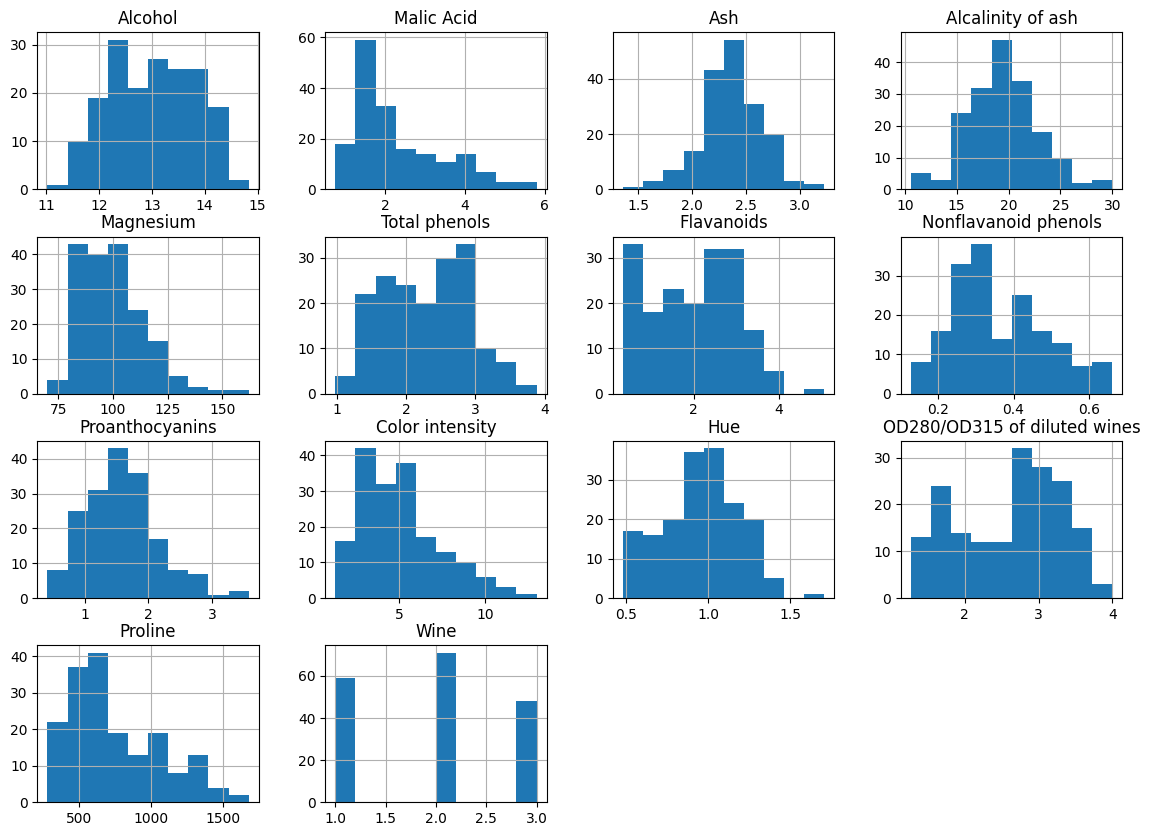

In [7]:
data.hist(column=cols, figsize=(14, 10))
None

In [8]:
data[num_cols].mean()

Alcohol                          13.000618
Malic Acid                        2.336348
Ash                               2.366517
Alcalinity of ash                19.494944
Magnesium                        99.741573
Total phenols                     2.295112
Flavanoids                        2.029270
Nonflavanoid phenols              0.361854
Proanthocyanins                   1.590899
Color intensity                   5.058090
Hue                               0.957449
OD280/OD315 of diluted wines      2.611685
Proline                         746.893258
dtype: float64

In [9]:
data[num_cols].min()

Alcohol                          11.03
Malic Acid                        0.74
Ash                               1.36
Alcalinity of ash                10.60
Magnesium                        70.00
Total phenols                     0.98
Flavanoids                        0.34
Nonflavanoid phenols              0.13
Proanthocyanins                   0.41
Color intensity                   1.28
Hue                               0.48
OD280/OD315 of diluted wines      1.27
Proline                         278.00
dtype: float64

In [10]:
data[num_cols].max()

Alcohol                           14.83
Malic Acid                         5.80
Ash                                3.23
Alcalinity of ash                 30.00
Magnesium                        162.00
Total phenols                      3.88
Flavanoids                         5.08
Nonflavanoid phenols               0.66
Proanthocyanins                    3.58
Color intensity                   13.00
Hue                                1.71
OD280/OD315 of diluted wines       4.00
Proline                         1680.00
dtype: float64

In [11]:
data[num_cols].std()

Alcohol                           0.811827
Malic Acid                        1.117146
Ash                               0.274344
Alcalinity of ash                 3.339564
Magnesium                        14.282484
Total phenols                     0.625851
Flavanoids                        0.998859
Nonflavanoid phenols              0.124453
Proanthocyanins                   0.572359
Color intensity                   2.318286
Hue                               0.228572
OD280/OD315 of diluted wines      0.709990
Proline                         314.907474
dtype: float64

In [12]:
import matplotlib.pyplot as plt

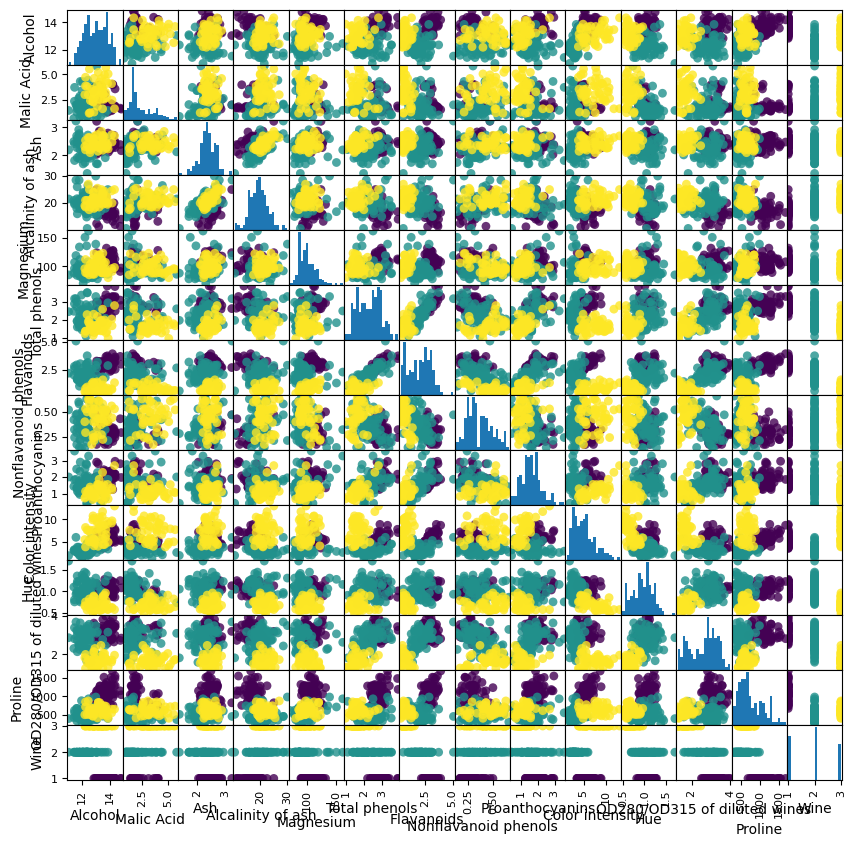

In [13]:
scat_mtrx = pd.plotting.scatter_matrix(data, c=data[target_col], figsize=(10, 10), marker='o',
                                       hist_kwds={'bins': 20}, s=40, alpha=.8)

# Масштабирование

In [14]:
X = (data[num_cols] - data[num_cols].mean())/data[num_cols].std()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [16]:
k_values = [3, 5, 10]

In [17]:
def train_features(feature_names):
    X_train, X_test, y_train, y_test = train_test_split(X[feature_names], data[target_col].values, test_size=0.2)
    results = []
    for k in k_values:
        model = KNN(k)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        accuracy = np.trace(cm) / np.sum(cm)
        results.append((k, cm, accuracy))
    return results

In [18]:
# Модель 1: Случайный выбор признаков
np.random.seed(42)
random_features = np.random.choice(X.columns, 5, replace=False)

# Модель 2: Фиксированный набор признаков
fixed_features = ['Alcohol', 'Flavanoids', 'Color intensity', 'Proline']


In [19]:
results_random = train_features(random_features)
results_fixed = train_features(fixed_features)


In [20]:
results_random

[(3,
  array([[10,  0,  0],
         [ 2, 12,  2],
         [ 1,  0,  9]]),
  np.float64(0.8611111111111112)),
 (5,
  array([[10,  0,  0],
         [ 2, 13,  1],
         [ 1,  0,  9]]),
  np.float64(0.8888888888888888)),
 (10,
  array([[10,  0,  0],
         [ 1, 13,  2],
         [ 1,  1,  8]]),
  np.float64(0.8611111111111112))]

In [21]:
results_fixed

[(3,
  array([[11,  1,  0],
         [ 1, 12,  0],
         [ 0,  1, 10]]),
  np.float64(0.9166666666666666)),
 (5,
  array([[12,  0,  0],
         [ 1, 12,  0],
         [ 0,  1, 10]]),
  np.float64(0.9444444444444444)),
 (10,
  array([[12,  0,  0],
         [ 1, 12,  0],
         [ 0,  0, 11]]),
  np.float64(0.9722222222222222))]